In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
iris_data = load_iris()
X = iris_data.data
y_original = iris_data.target
y = tf.keras.utils.to_categorical(y_original)
assert y.shape == (150,3)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [4]:
model = Sequential()
model.add(Input(shape=X_train[0].shape))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy()])

In [6]:
history = model.fit(X_train,y_train, epochs=200, batch_size=5)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 1.2261   
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 1.1777 
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 1.0912 
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.9917 
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.8925 
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.0000e+00 - loss: 0.8915
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.0000e+00 - loss: 0.8739
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.0000e+00 - loss: 0.8809
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.0000e+00 - loss: 0.8071
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.0000e+00 - loss: 0.7790
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.0000e+00 - loss: 0.7627


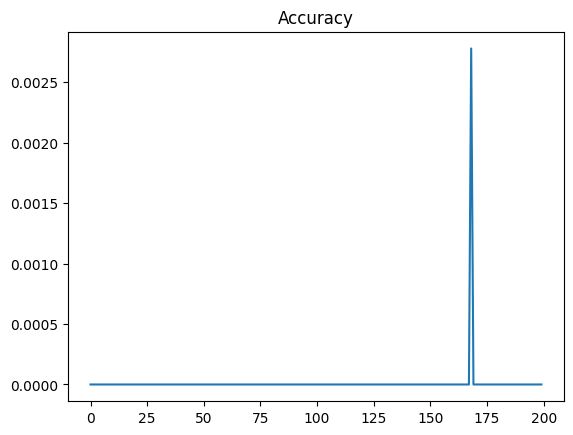

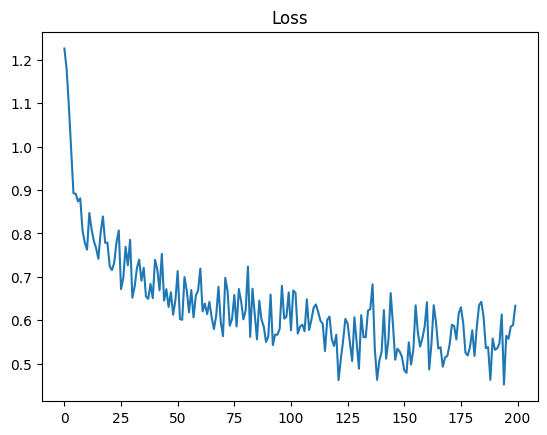

In [7]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(history.history['accuracy'],label = "accuracy")
plt.title('Accuracy')
plt.figure(2)
plt.title('Loss')
plt.plot(history.history['loss'],label = "loss")